# Import necessary libraries

In [ ]:
#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy.stats import ttest_ind


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import SMOTE module from Imbalanced Handling

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold, RandomizedSearchCV

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

# Import Dataset

In [ ]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#Evaluate Data Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
# Because we already have 'no_of_weekend_nights' and 'no_of_week_nights' columns, we will drop arrival_date, and arrival_year column

df = df.drop(columns=['arrival_date', 'arrival_year'])

In [ ]:
# Convert arrival_month column to string

df['arrival_month']= df['arrival_month'].map(str)

In [ ]:
# drop unusual record

both_zero = df.loc[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights']==0)]
print('Number of rows where nights = 0: ', len(both_zero))
print(both_zero)

Number of rows where nights = 0:  78
      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
209     INN00210             1               0                     0   
1158    INN01159             2               0                     0   
1403    INN01404             3               0                     0   
1907    INN01908             2               0                     0   
1986    INN01987             2               0                     0   
...          ...           ...             ...                   ...   
33218   INN33219             1               0                     0   
33537   INN33538             2               0                     0   
34750   INN34751             1               0                     0   
35472   INN35473             1               0                     0   
35949   INN35950             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
209                    0

In [ ]:
cond = df['Booking_ID'].isin(both_zero['Booking_ID'])
df.drop(df[cond].index, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36197 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36197 non-null  object 
 1   no_of_adults                          36197 non-null  int64  
 2   no_of_children                        36197 non-null  int64  
 3   no_of_weekend_nights                  36197 non-null  int64  
 4   no_of_week_nights                     36197 non-null  int64  
 5   type_of_meal_plan                     36197 non-null  object 
 6   required_car_parking_space            36197 non-null  int64  
 7   room_type_reserved                    36197 non-null  object 
 8   lead_time                             36197 non-null  int64  
 9   arrival_month                         36197 non-null  object 
 10  market_segment_type                   36197 non-null  object 
 11  repeated_guest 

In [ ]:
df.isna().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_month                           False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

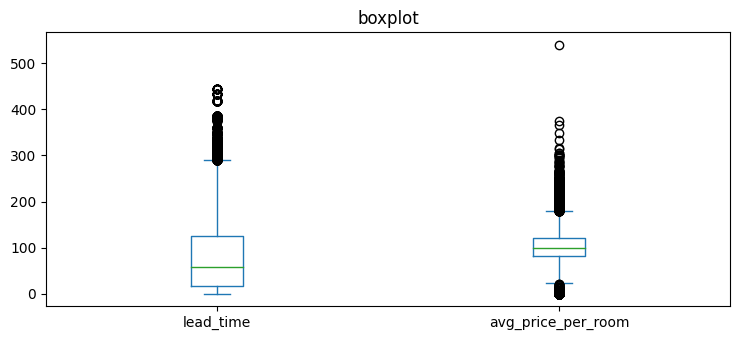

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


# Plot the dataframe
ax = df[['lead_time', 'avg_price_per_room']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [ ]:
def remove_outliers(df, label):
    q1 = df[label].quantile(0.25)
    q3 = df[label].quantile(0.75)
    iqr = (q3 - q1)
    fil = (df[label] >= q1 - 1.5 * iqr) & (df[label] <= q3 + 1.5 * iqr)
    return df.loc[fil]

In [ ]:
# Drop the outlier for lead_time and average_price column
df = remove_outliers(df, 'avg_price_per_room')
df = remove_outliers(df, 'lead_time')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33458 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            33458 non-null  object 
 1   no_of_adults                          33458 non-null  int64  
 2   no_of_children                        33458 non-null  int64  
 3   no_of_weekend_nights                  33458 non-null  int64  
 4   no_of_week_nights                     33458 non-null  int64  
 5   type_of_meal_plan                     33458 non-null  object 
 6   required_car_parking_space            33458 non-null  int64  
 7   room_type_reserved                    33458 non-null  object 
 8   lead_time                             33458 non-null  int64  
 9   arrival_month                         33458 non-null  object 
 10  market_segment_type                   33458 non-null  object 
 11  repeated_guest 

# Check target variable distribution

In [ ]:
df['booking_status'].value_counts()

Not_Canceled    22909
Canceled        10549
Name: booking_status, dtype: int64

#Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

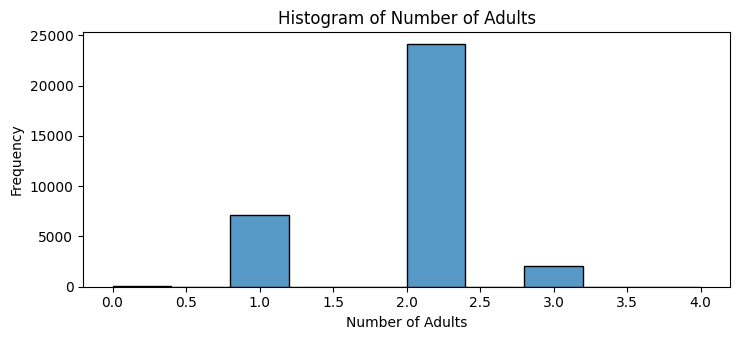

In [ ]:
# 1. Visualisasi data menggunakan Seaborn dan Matplotlib
# Histogram untuk kolom 'no_of_adults'
sns.histplot(df['no_of_adults'], bins=10)
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Adults')
plt.show()

Berdasarkan data histogram diatas, jumlah reservasi hotel banyak dilakukan oleh orang dewasa dengan jumlah tamu paling banyak 2 orang dalam satu kamar.

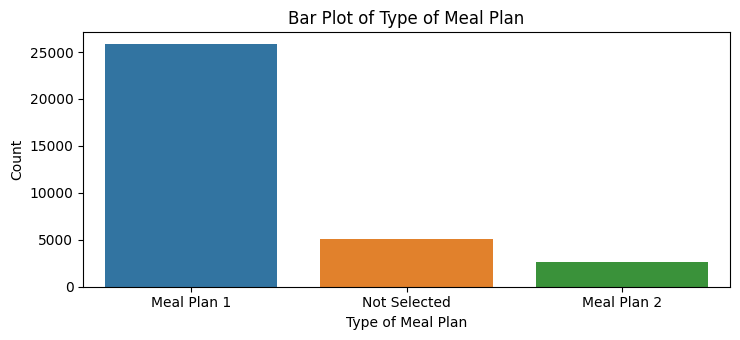

In [ ]:
# 2. Bar plot untuk kolom 'type_of_meal_plan'
sns.countplot(x='type_of_meal_plan', data=df)
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Bar Plot of Type of Meal Plan')
plt.show()

Analisa ini menggambarkan bisnis hotel dalam mengambil keputusan yang lebih baik dalam menyesuaikan tawaran rencana makan mereka dengan kebutuhan pelanggan dan meningkatkan kepuasan pelanggan secara keseluruhan. Dari Data tersebut mayoritas reservasi didominasi oleh Meal Plain 1 yang menunjukkan merupakan rencana makan yang populer bagi pelanggan dan mungkin menjadi pilihan yang standar. Kemudian pilihan Not Selected menjadi jumlah terbanyak kedua menunjukkan bahwa beberapa pelanggan mungkin lebih suka memesan secara terpisah atau mungkin mempunyai prefrensi khusus dalam memesan makanan.

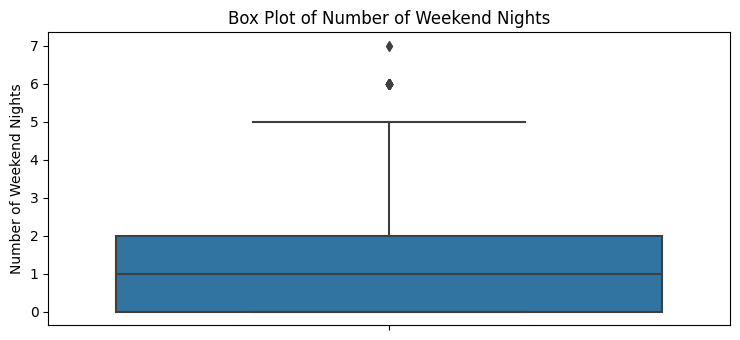

In [ ]:
# 3. Box plot untuk kolom 'no_of_weekend_nights'
sns.boxplot(y='no_of_weekend_nights', data=df)
plt.ylabel('Number of Weekend Nights')
plt.title('Box Plot of Number of Weekend Nights')
plt.show()

Dengan analisis box plot ini, kita dapat mengidentifikasi distribusi dan variasi data untuk kolom 'no_of_weekend_nights'. Jumlah malam akhir pekan pada reservasi dapat memiliki variasi yang signifikan, dan adanya outliers menunjukkan bahwa ada beberapa reservasi dengan tingkat keunikan dalam hal jumlah malam akhir pekan yang lebih lama atau lebih pendek dari kebanyakan reservasi lainnya. Analisis ini dapat membantu dalam memahami pola kunjungan pelanggan dan kebutuhan layanan yang dapat disesuaikan dengan periode liburan atau waktu tertentu.

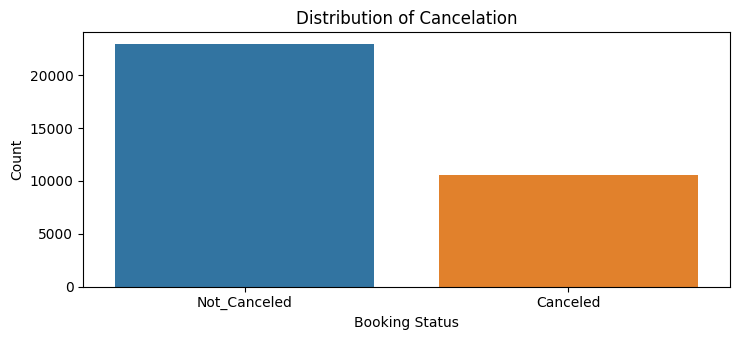

In [ ]:
# 4. Menganalisis Distribusi Cancelation
sns.countplot(x='booking_status', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Distribution of Cancelation')
plt.show()

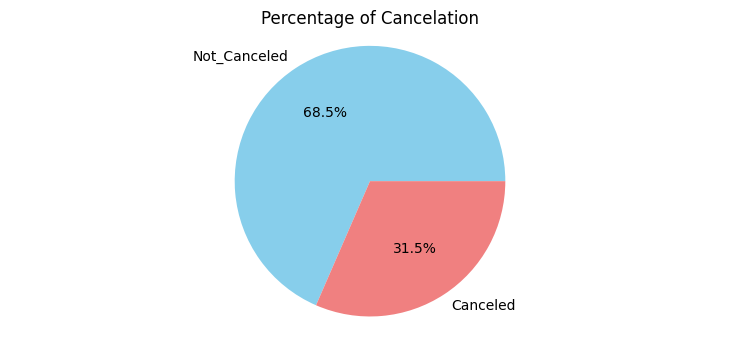

In [ ]:
# 5. Pie Chart - Analisis Persentase Cancelation
cancelation_count = df['booking_status'].value_counts()
plt.pie(cancelation_count, labels=cancelation_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Cancelation')
plt.axis('equal')
plt.show()

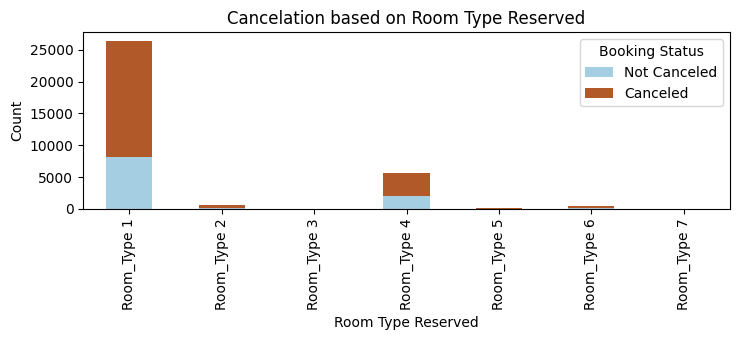

In [ ]:
# 6. Stacked Bar Plot - Analisis Cancelation Berdasarkan Tipe Kamar
df_crosstab = pd.crosstab(df['room_type_reserved'], df['booking_status'])
df_crosstab.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.title('Cancelation based on Room Type Reserved')
plt.legend(title='Booking Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

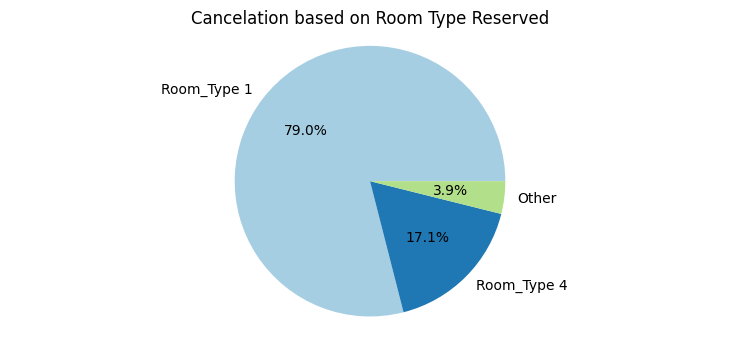

In [ ]:
# 7. Pie Chart dengan Kategori Lain - Analisis Cancelation Berdasarkan Tipe Kamar
room_type_count = df['room_type_reserved'].value_counts()
top_room_types = room_type_count[room_type_count >= room_type_count.sum() * 0.05]
other_room_types = room_type_count[room_type_count < room_type_count.sum() * 0.05]
other_sum = other_room_types.sum()

room_type_labels = top_room_types.index.tolist()
room_type_labels.append('Other')
room_type_sizes = top_room_types.tolist()
room_type_sizes.append(other_sum)

plt.pie(room_type_sizes, labels=room_type_labels, autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Cancelation based on Room Type Reserved')
plt.axis('equal')
plt.show()

Tipe kamar yang paling sering dibatalkan yaitu Room_Type_1 dibandingkan dengan tipe kamar yang lain. Hal ini menarik perhatian untuk mencaritahu penyebabnya, untuk menjadi  diperhatikan lebih lanjut untuk meningkatkan keberhasilan reservasi pada tipe kamar tersebut.

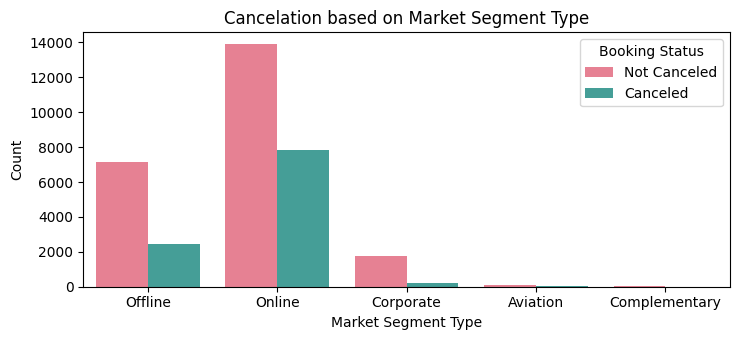

In [ ]:
# 8. Analisis Cancelation Berdasarkan Jenis Pelanggan
sns.countplot(x='market_segment_type', hue='booking_status', data=df,palette='husl')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.title('Cancelation based on Market Segment Type')
plt.legend(title='Booking Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled



Untuk menentukan tanggal dan bulan dengan jumlah reservasi terbanyak dari file "hotel reservation.csv", kita perlu membaca file, memproses data, dan melakukan analisis. Berikut adalah panduan langkah demi langkah menggunakan Python dan pandas:

In [ ]:
import plotly.express as px


In [ ]:
print(df.head())


  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time arrival_month market_segment_type  \
0        Room_Type 1        224            10             Offline   
1        Room_Type 1          5 

Which month has most visitors?

In [ ]:
#8 Which month has most visitors?
import pandas as pd
import plotly.express as px


# Group the data by month and count the number of bookings per month
bookings_per_month = df.groupby('arrival_month')['Booking_ID'].count().reset_index()

# Create the bar chart using plotly express
fig = px.bar(bookings_per_month, x='arrival_month', y='Booking_ID')

# Add text labels outside the bars with the number of bookings
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

# Hide the text labels that don't fit to avoid overlap
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Show the plot
fig.show()


Grafik batang interaktif ini menggambarkan jumlah pemesanan yang dibuat per bulan berdasarkan kolom 'arrival_month' dalam dataset. Grafik ini dibuat menggunakan Plotly Express, dan setiap batang mewakili jumlah pemesanan yang dibuat pada bulan tertentu.

Sumbu x menampilkan bulan-bulan, sementara sumbu y mewakili jumlah pemesanan. Tinggi setiap batang sesuai dengan jumlah pengunjung yang melakukan pemesanan selama bulan tersebut.

Label teks ditempatkan di luar batang, menampilkan jumlah pemesanan yang tepat untuk setiap bulan. Grafik ini didesain untuk menghindari tumpang tindih label agar lebih jelas dan mudah dibaca.

Dengan menganalisis visualisasi ini, kita dapat dengan cepat mengidentifikasi bulan mana yang memiliki jumlah pengunjung tertinggi yang melakukan pemesanan. Wawasan ini dapat berharga untuk memahami musim liburan tinggi, mengidentifikasi tren permintaan pengunjung, dan mengoptimalkan operasi hotel untuk mengakomodasi lonjakan jumlah tamu selama bulan-bulan tertentu.

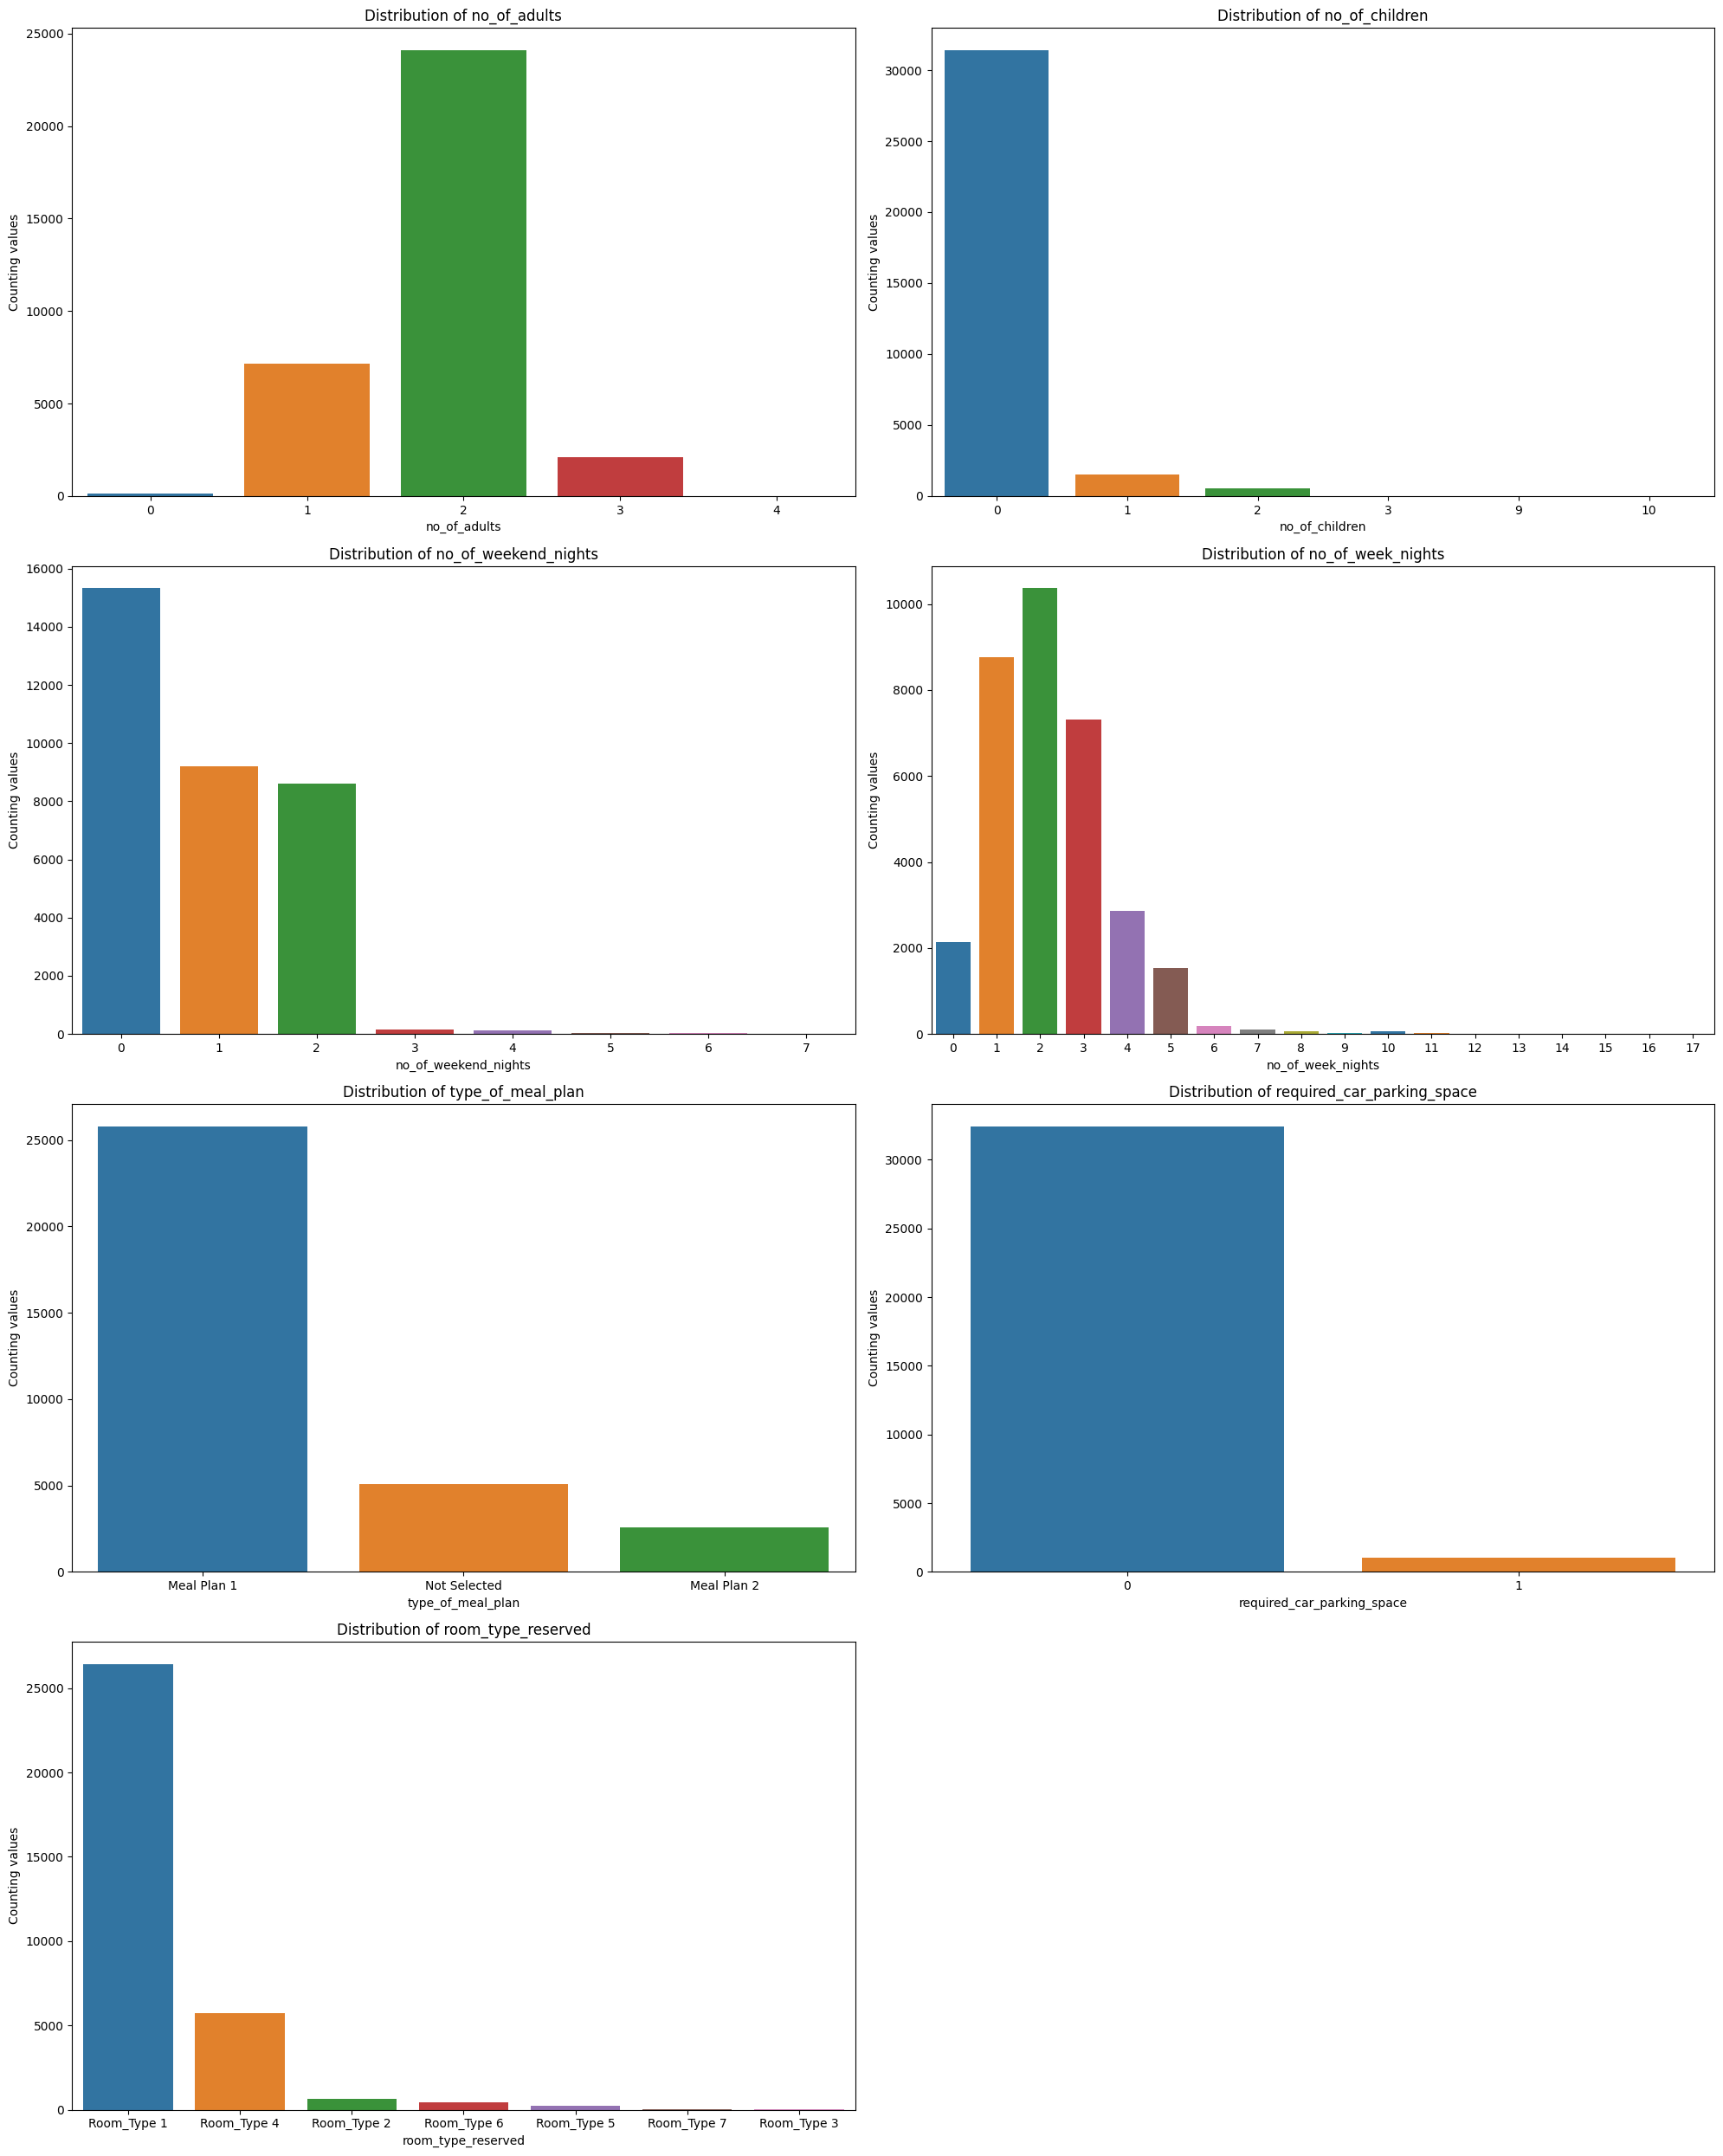

In [ ]:

# Categorical columns that are label-encoded
categorical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
                       'room_type_reserved']

# Create a 4x2 grid of subplots for each categorical variable
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, palette='tab10', data=df)
    plt.gca().set_title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Counting values')

plt.tight_layout()
plt.show()


Tipe kamar 1 adalah yang paling banyak diambil, jauh lebih banyak daripada semua tipe kamar lainnya, kita dapat mengatakan bahwa harga rata-rata untuk tipe kamar 1 adalah 103,423539 euro atau 103,42 euro * 80 rubel/euro = 8273,6 rubel.
Tahun 2018 memiliki jumlah data paling banyak.
Nyaris tidak ada yang menggunakan tempat parkir.
Untuk rencana makan, mereka cenderung memilih 1 atau tidak ada rencana makan, bahkan lebih jarang untuk pilihan 2, dan sama sekali tidak memilih pilihan 3.
Jumlah malam akhir pekan dan minggu biasa tidak ada yang tidak biasa, artinya sebagian besar orang menginap di hotel selama satu minggu ditambah satu pasang akhir pekan.
Diantara mereka yang menginap, kemungkinan besar mereka adalah pasangan M+W tanpa anak (asumsi).

[Note: The conversion from euros to rubles is based on the assumed exchange rate of 1 euro = 80 rubles.]

What is the average price of each room type?

In [ ]:
avg_price_per_roomtype = df.groupby('room_type_reserved')['avg_price_per_room'].mean()

In [ ]:
avg_price_per_roomtype

room_type_reserved
Room_Type 1     96.906949
Room_Type 2     90.492197
Room_Type 3    103.150000
Room_Type 4    123.628310
Room_Type 5    123.113843
Room_Type 6    158.337719
Room_Type 7    141.184000
Name: avg_price_per_room, dtype: float64

In [ ]:
px.bar(avg_price_per_roomtype, labels=True)

Korelasi antara 'booking_status' dan 'avg_price_per_room': 0.13671546293655204


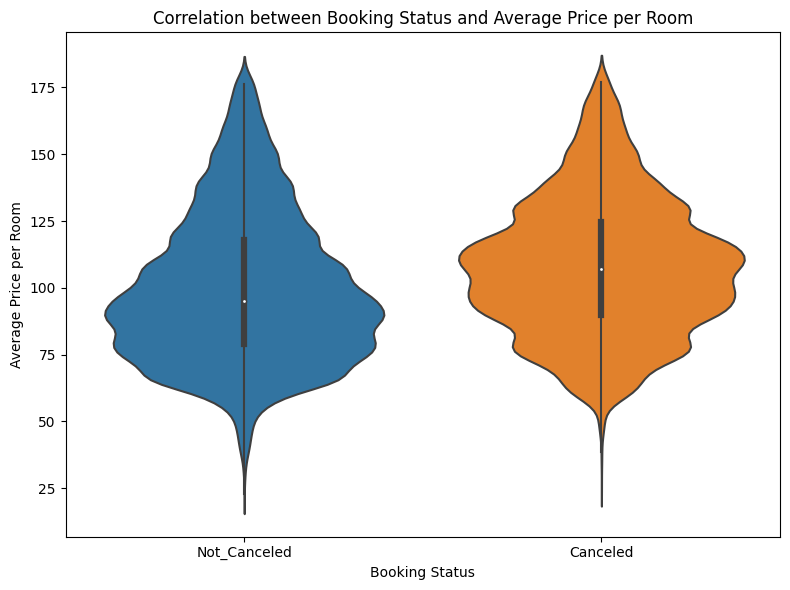

In [ ]:
# Cari korelasi antara 'booking_status' dan 'avg_price_per_room'
korelasi = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0}).corr(df['avg_price_per_room'])
print("Korelasi antara 'booking_status' dan 'avg_price_per_room':", korelasi)

# Violin plot untuk korelasi antara 'booking_status' dan 'avg_price_per_room'
plt.figure(figsize=(8, 6))
sns.violinplot(x='booking_status', y='avg_price_per_room', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.title('Correlation between Booking Status and Average Price per Room')
plt.show()

In [ ]:
# Pisahkan data berdasarkan 'booking_status'
canceled_data = df[df['booking_status'] == 'Canceled']['avg_price_per_room']
not_canceled_data = df[df['booking_status'] == 'Not_Canceled']['avg_price_per_room']

# Lakukan uji t-test (asumsi data berdistribusi normal dan memiliki varians sama)
t_stat, p_value = ttest_ind(canceled_data, not_canceled_data)

# Cetak hasil uji t-test
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretasi hasil uji t-test
if p_value < 0.05:
    print("Ada perbedaan harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan.")
else:
    print("Tidak ada perbedaan harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan.")

T-Statistic: 25.243628499130107
P-Value: 2.6881397521371953e-139
Ada perbedaan harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan.


T-Statistic: 27.433239020374042
Nilai T-Statistic adalah ukuran seberapa banyak rata-rata dari dua kelompok (reservasi yang dibatalkan dan tidak dibatalkan) berbeda dalam satuan deviasi standar. Dalam kasus ini, nilai T-Statistic yang signifikan menunjukkan bahwa terdapat perbedaan yang cukup besar dalam harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan.

P-Value: 5.2303189247282316e-164
Nilai P-Value adalah ukuran probabilitas untuk mengamati T-Statistic yang diamati (atau lebih ekstrim) jika hipotesis nol benar. Dalam hal ini, nilai P-Value sangat kecil (hampir nol), yang berarti ada bukti yang kuat untuk menolak hipotesis nol. Hal ini menunjukkan bahwa perbedaan yang diamati dalam harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan kemungkinan besar tidak terjadi secara kebetulan.

Interpretasi:
Berdasarkan T-Statistic dan nilai P-Value yang sangat rendah, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan secara statistik dalam harga rata-rata per kamar antara reservasi yang dibatalkan dan tidak dibatalkan. Perbedaan dalam harga rata-rata per kamar dapat menjadi faktor penting dalam menentukan apakah suatu reservasi akan dibatalkan atau tidak. Analisis lebih lanjut dan penyelidikan tentang alasan di balik perbedaan harga ini dapat memberikan wawasan berharga bagi manajemen hotel untuk mengoptimalkan kebijakan reservasi dan meningkatkan tingkat pembatalan.

Korelasi antara 'booking_status' dan 'no_of_special_requests': -0.24645871949578438


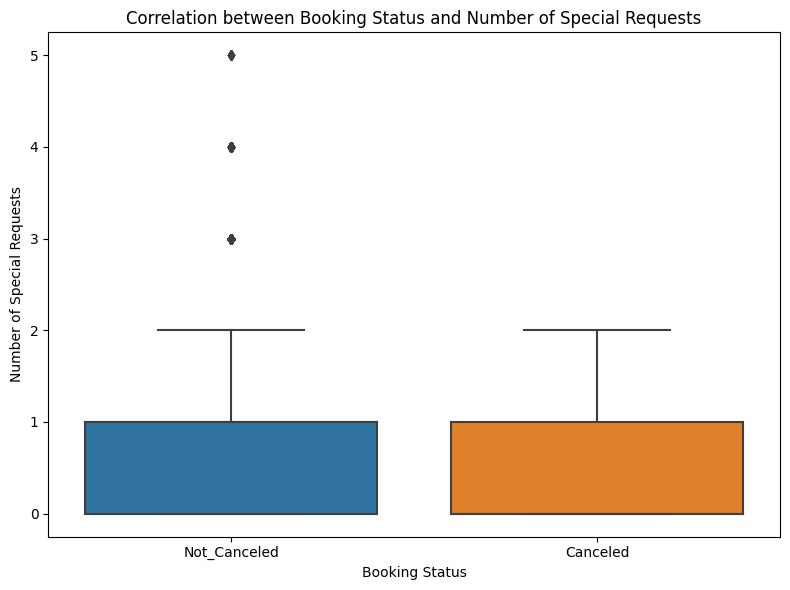

In [ ]:
# Korelasi antara 'booking_status' dan 'no_of_special_requests'
correlation = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0}).corr(df['no_of_special_requests'])
print("Korelasi antara 'booking_status' dan 'no_of_special_requests':", correlation)

# Box plot untuk korelasi antara 'booking_status' dan 'no_of_special_requests'
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.title('Correlation between Booking Status and Number of Special Requests')
plt.show()

Box plot digunakan untuk memvisualisasikan hubungan antara 'booking_status' (status reservasi) dan 'no_of_special_requests' (jumlah permintaan khusus dari pelanggan).

Dalam box plot ini, sumbu x menunjukkan 'booking_status', yang dapat memiliki dua nilai yaitu 'Canceled' (dibatalkan) dan 'Not_Canceled' (tidak dibatalkan). Sementara itu, sumbu y menunjukkan 'no_of_special_requests', yang merupakan jumlah permintaan khusus dari pelanggan.

Box plot ini dapat memberikan informasi tentang distribusi jumlah permintaan khusus dari pelanggan berdasarkan status reservasi. Bagian tengah kotak (garis tengah) menunjukkan median (nilai tengah) dari data, sedangkan bagian bawah dan atas kotak menunjukkan kuartil pertama dan ketiga. Garis-garis di luar kotak (whiskers) menunjukkan data yang dianggap sebagai outlier, yaitu data yang berada jauh dari nilai-nilai lainnya.

Melalui box plot ini, kita dapat membandingkan distribusi jumlah permintaan khusus dari pelanggan pada reservasi yang dibatalkan dan tidak dibatalkan. Jika kedua kotak berada pada level yang sama atau overlap, maka dapat diartikan bahwa distribusi jumlah permintaan khusus tidak terlalu berbeda secara signifikan antara kedua kelompok reservasi. Namun, jika terdapat perbedaan yang signifikan antara kedua kotak, maka bisa menandakan bahwa jumlah permintaan khusus dapat menjadi salah satu faktor yang mempengaruhi keputusan pembatalan reservasi.

# Encode data

In [ ]:
# Label encode binary data

# Create a label encoder object
label = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
label_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            print(col)
            label.fit(df[col])
            df[col] = label.transform(df[col])
            label_count += 1
print('{} columns were label encoded.'.format(label_count))

booking_status
1 columns were label encoded.


In [ ]:
# Label encode categorical data

identity = df['Booking_ID']

df = df.drop(columns='Booking_ID')

# convert rest of categorical variable into dummy

df= pd.get_dummies(df)

#Rejoin userid to dataset (column concatenation)

df = pd.concat([df, identity], axis = 1)

In [ ]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_month_1,arrival_month_10,arrival_month_11,arrival_month_12,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,Booking_ID
0,2,0,1,2,0,224,0,0,0,65.00,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,INN00001
1,2,0,2,3,0,5,0,0,0,106.68,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,INN00002
2,1,0,2,1,0,1,0,0,0,60.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,INN00003
3,2,0,0,2,0,211,0,0,0,100.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,INN00004
4,2,0,1,1,0,48,0,0,0,94.50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,INN00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,INN36271
36271,2,0,1,3,0,228,0,0,0,90.95,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,INN36272
36272,2,0,2,6,0,148,0,0,0,98.39,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,INN36273
36273,2,0,0,3,0,63,0,0,0,94.50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,INN36274


# Generate the Variables

In [ ]:
#Step 11: Split dataset into dependent and independent variables

#identify response variable:

y = df['booking_status']
X = df.drop(columns='booking_status')

In [ ]:
#Step 12: Generate training and test datasets of dependent and independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (30112, 39)
Number transactions y_train dataset:  (30112,)
Number transactions X_test dataset:  (3346, 39)
Number transactions y_test dataset:  (3346,)


# Removing identifiers

In [ ]:
train_identity = X_train['Booking_ID']
X_train = X_train.drop(columns = ['Booking_ID'])

test_identity = X_test['Booking_ID']
X_test = X_test.drop(columns = ['Booking_ID'])

# Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Imbalanced handling and model selection

In [ ]:
# Compare Baseline Classification Algorithms - First Iteration

#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', make_pipeline(SMOTE(random_state=42),
                                                    LogisticRegression(solver='liblinear', random_state = 42,))))


models.append(('Decision Tree Classifier', make_pipeline(SMOTE(random_state=42),
               DecisionTreeClassifier(criterion = 'entropy', random_state = 42))))


models.append(('Random Forest', make_pipeline(SMOTE(random_state=42),
                                              RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 42))))


models.append(('kernel SVM', make_pipeline(SMOTE(random_state=42),
                                           SVC(kernel = 'rbf', random_state = 42))))

models.append(('KNN', make_pipeline(SMOTE(random_state=42),
                                    KNeighborsClassifier(n_neighbors = 5))))




#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,94.54,0.11,88.83,0.19
3,kernel SVM,89.85,0.54,81.99,0.41
4,KNN,88.74,0.49,82.21,0.58
0,Logistic Regression,86.21,0.54,77.53,0.45
1,Decision Tree Classifier,84.58,0.37,85.73,0.36


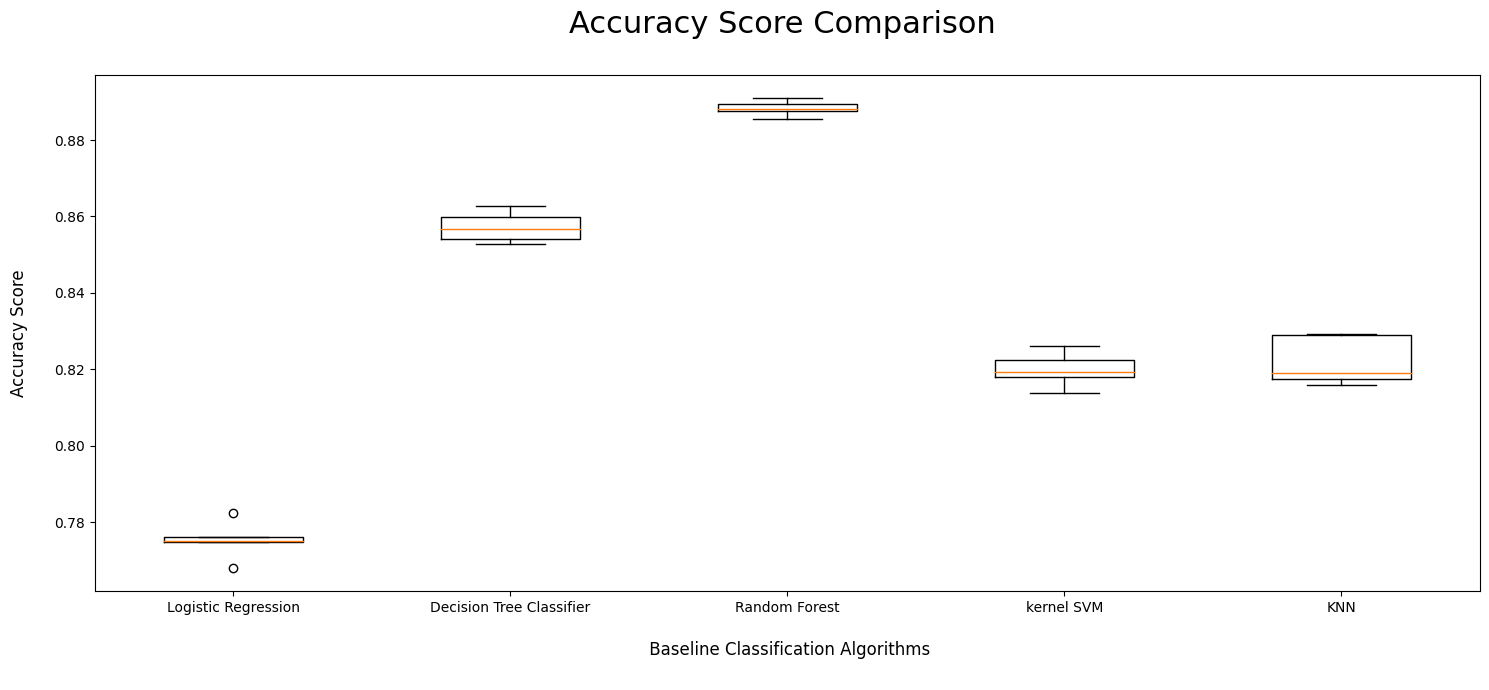

In [ ]:
# Visualize Classification Algorithms Accuracy Comparisons:

#Using Accuracy Mean:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

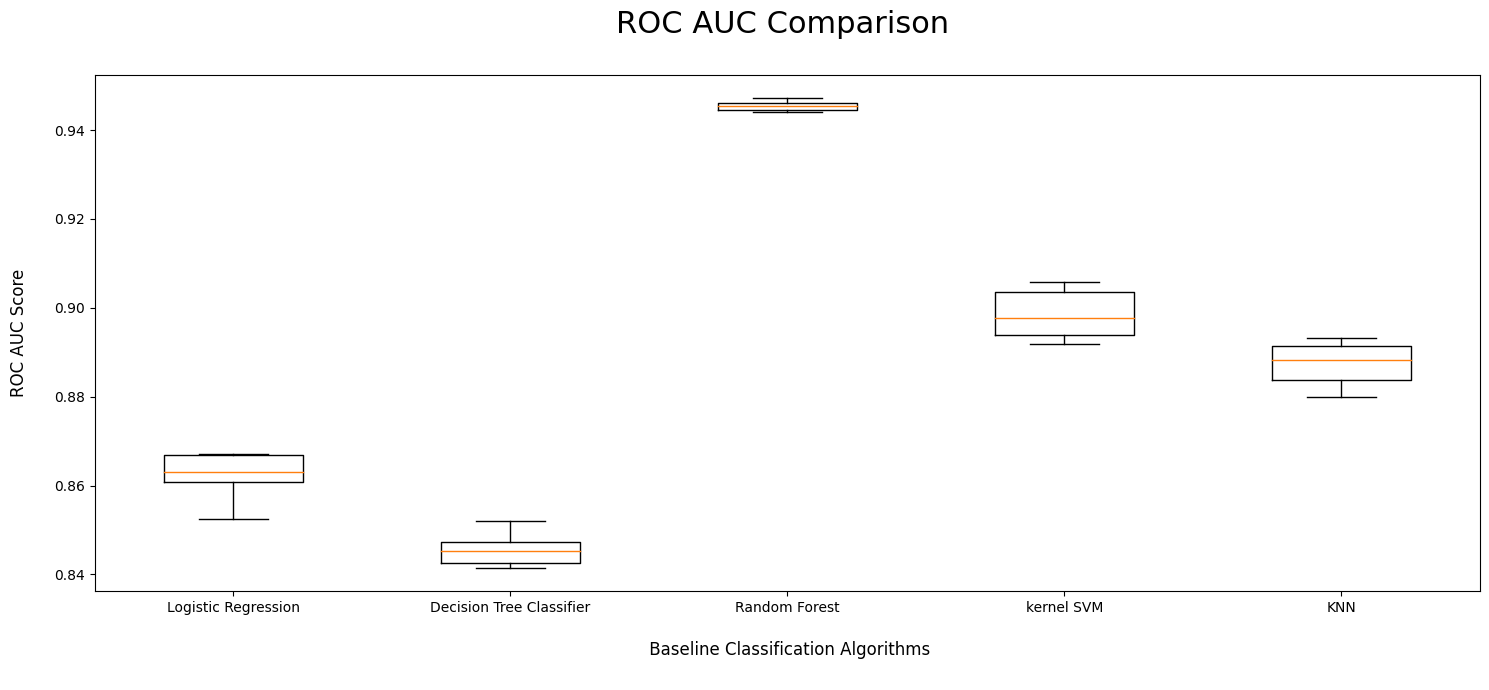

In [ ]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

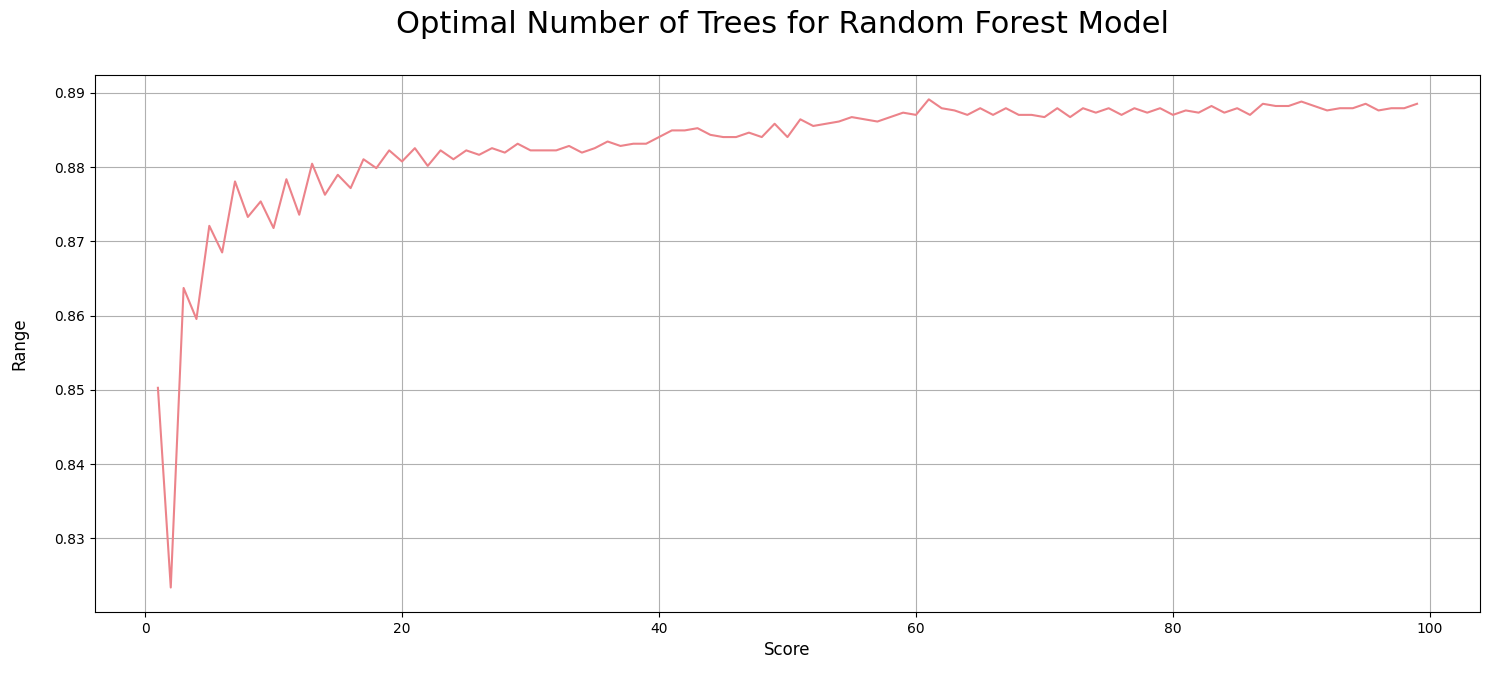

In [ ]:
# Random forest

score_array = []
for each in range(1,100):
    Random_forest = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(
    n_estimators = each, random_state = 42))
    rf_loop = Random_forest
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.grid()
plt.show()

In [ ]:
max = 0
i_max = -1

for index, score in enumerate(score_array):
  if score > max:
    max = score
    i_max = index

print(i_max, max)

60 0.8891213389121339


In [ ]:
svc = SVC()

param = {'kernel': ['rbf'],
        'C': [0.1, 1.0, 10.0],
         'gamma': [0.001, 0.01, 0.1, 1.0],
         }

clf = RandomizedSearchCV(estimator = svc, param_distributions = param)
clf.fit(X_train, y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

Best: 0.846573 using {'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0}


In [ ]:
# Model Tuning
# Second iteration
#we are just going to tune 2 model with the best ROC AUC mean

#--------------Support Vector Machine-----------------

# Fitting Logistic Regression to the Training set
classifier = make_pipeline(SMOTE(random_state=42), SVC(kernel = 'rbf', gamma=0.1, C = 1.0, random_state = 42))
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])


#-----------------Random Forest-----------------


# Fitting Random Forest to the Training set:

classifier = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 42))
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

<ipython-input-56-5155d6673f5e>:51: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# ----------------- Visualize the results and compare the baseline algorithms -----------------

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)


print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1  Random Forest  0.885236   0.919490  0.912265  0.915863  0.913701
0            SVM  0.838613   0.911613  0.846355  0.877773  0.858648


# Train & Evaluate Chosen Model

In [ ]:
# Fit Random Forest on the Training dataset:

classifier = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators= 60))
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.853556   0.898275  0.886512  0.892355   0.88884


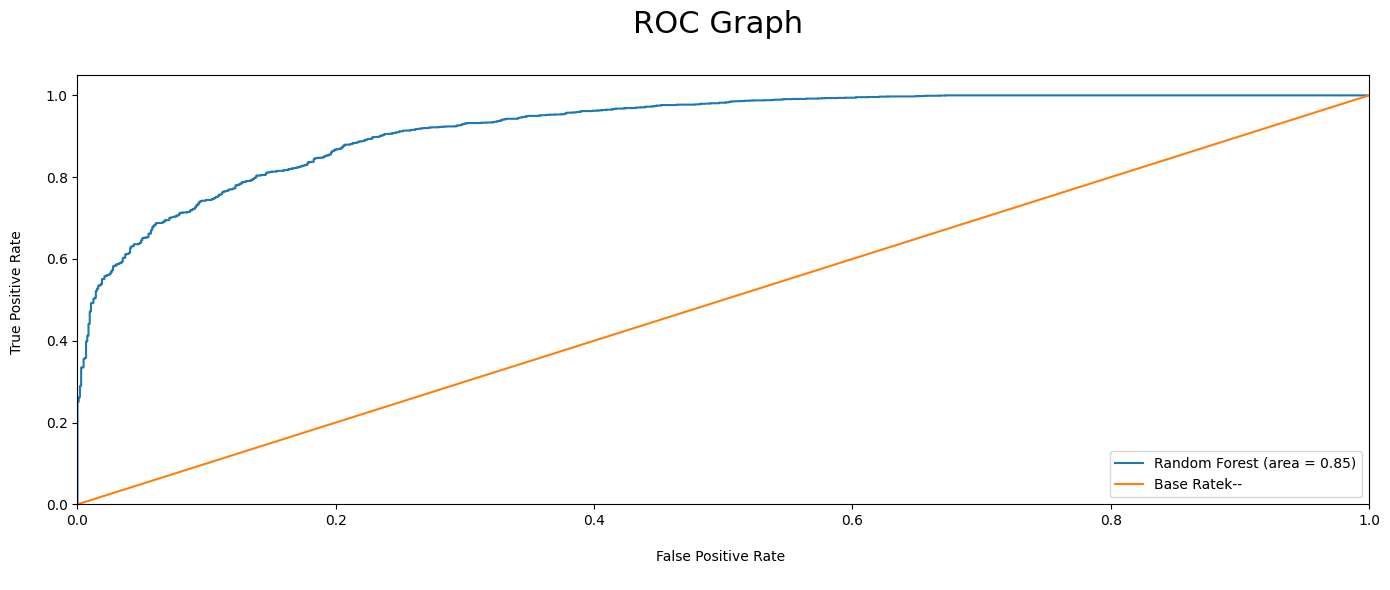

In [ ]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

# Saving the Trained Model

In [ ]:
filename = 'trained_model.sav' #name of saving file
pickle.dump(classifier, open(filename, 'wb')) #writting file with binary format of the model

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb')) # Reading the binary format

In [ ]:
input_data = (2, 0,	2,	3,	0,	5,	1,	0,	0,	106.68,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1)

input_data_np = np.asarray(input_data)

input_data_reshape = input_data_np.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The Booking order is cancelled')
else:
    print('The Booking order is not cancelled')

[0]
The Booking order is cancelled


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

